In [191]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import RobustScaler,PowerTransformer
import lightgbm as lgb
import seaborn as sns

In [192]:
df = pd.read_csv('data/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding="latin-1", delimiter=';')
df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [193]:
2151264665%16+1

10

In [194]:
data = df[['Ngày','10','11','16']]
data

,Ngày,10,11,16
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.1,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5
...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.1
361,28/12/2021,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6


In [195]:
data = data.set_index('Ngày')

# Boxplot

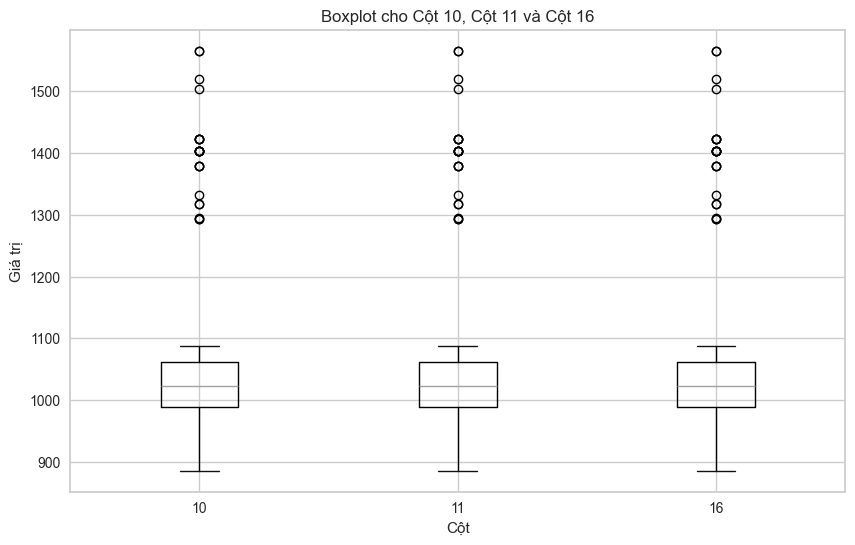

In [196]:
# Tạo boxplot cho cả hai cột
plt.figure(figsize=(10, 6))
data.boxplot()

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot cho Cột 10, Cột 11 và Cột 16')
plt.ylabel('Giá trị')
plt.xlabel('Cột')
plt.show()

# Biểu đồ đường

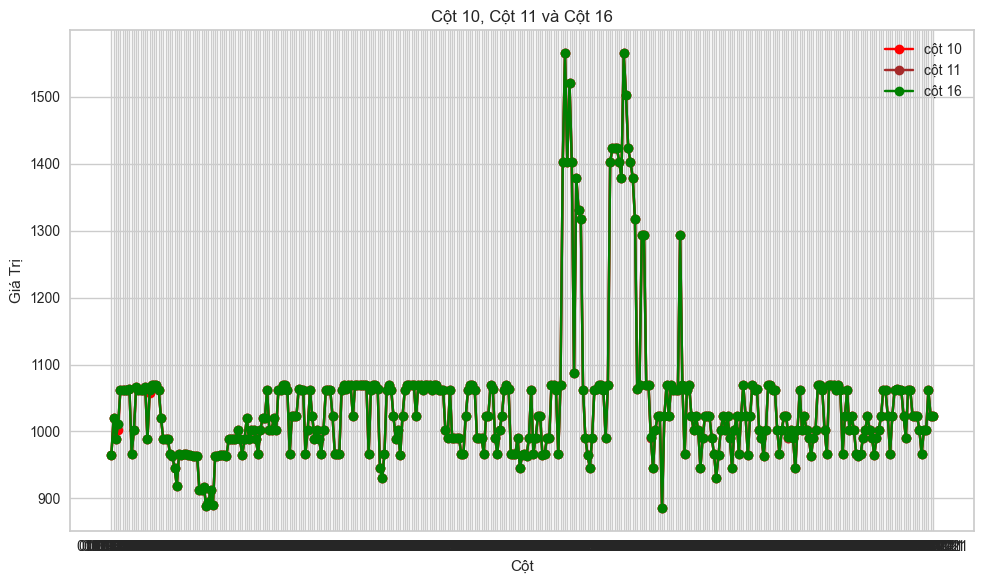

In [197]:
plt.figure(figsize=(10, 6))
plt.plot(data['10'],marker='o',label='cột 10',color='red')
plt.plot(data['11'],marker='o',label='cột 11',color='brown')
plt.plot(data['16'],marker='o',label='cột 16',color='green')
plt.title('Cột 10, Cột 11 và Cột 16')
plt.xlabel('Cột')
plt.ylabel('Giá Trị')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Biều đồ cột

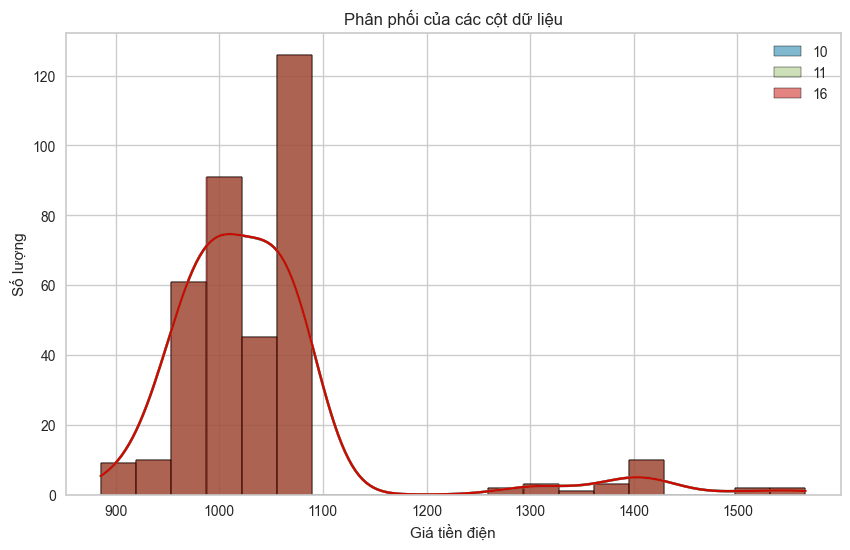

In [198]:
# Trực quan hóa phân phối của các cột dữ liệu
plt.figure(figsize=(10, 6))
for column in data.columns:
    sns.histplot(data[column], bins=20, kde=True, label=column)
plt.xlabel("Giá tiền điện")
plt.ylabel("Số lượng")
plt.title("Phân phối của các cột dữ liệu")
plt.legend()
plt.show()

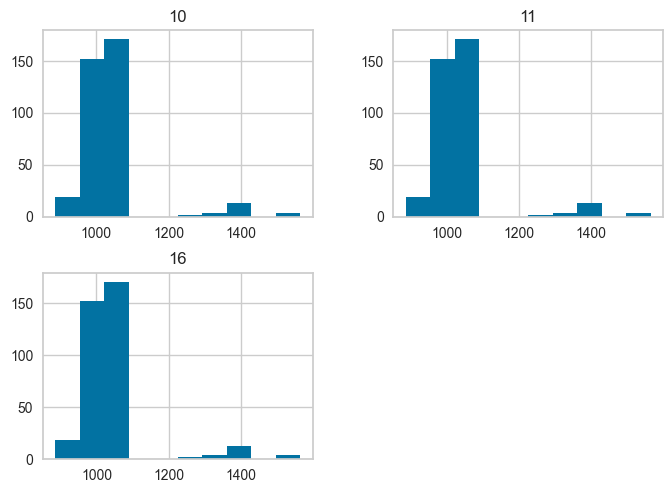

In [199]:
data.hist()
plt.xlabel("Column Name")
plt.ylabel("Frequency")
plt.title("Distribution of Each Column")
plt.subplots_adjust(bottom=0.1)  # Adjust layout for better visibility
plt.show()

# Kalman

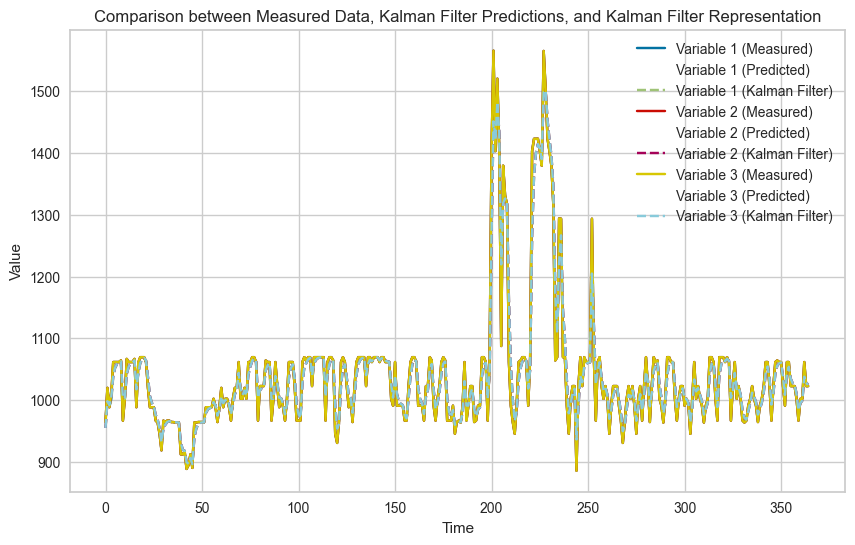

In [200]:
from pykalman import KalmanFilter
import numpy as np

data = np.array(df[['10', '11', '16']])

kf = KalmanFilter(
    initial_state_mean=np.zeros(3),  # Giả sử trạng thái ban đầu là [0, 0, 0]
    initial_state_covariance=np.eye(3),
    observation_matrices=np.eye(3),  # Mỗi biến trạng thái đều được quan sát trực tiếp
    observation_covariance=np.eye(3) * 0.01,  # Ma trận hiệp phương sai của quá trình đo lường
    transition_matrices=np.eye(3),  # Không có sự thay đổi trong trạng thái
    transition_covariance=np.eye(3) * 0.01,  # Ma trận hiệp phương sai của quá trình dự báo
)

# Áp dụng filter lên dữ liệu để ước lượng trạng thái
state_means, _ = kf.filter(data)

predicted_state_means, _ = kf.filter_update(state_means[-1], kf.transition_covariance)

plt.figure(figsize=(10, 6))
for i in range(3):  # Vẽ từng biến trạng thái
    plt.plot(data[:, i], label=f'Variable {i+1} (Measured)')
    plt.plot(range(len(data), len(data) + 1), predicted_state_means[i], 'rx', label=f'Variable {i+1} (Predicted)')
    plt.plot(state_means[:, i], label=f'Variable {i+1} (Kalman Filter)', linestyle='--')  # Đường biểu diễn của Kalman Filter
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison between Measured Data, Kalman Filter Predictions, and Kalman Filter Representation')
plt.legend()
plt.grid(True)
plt.show()

# HMM


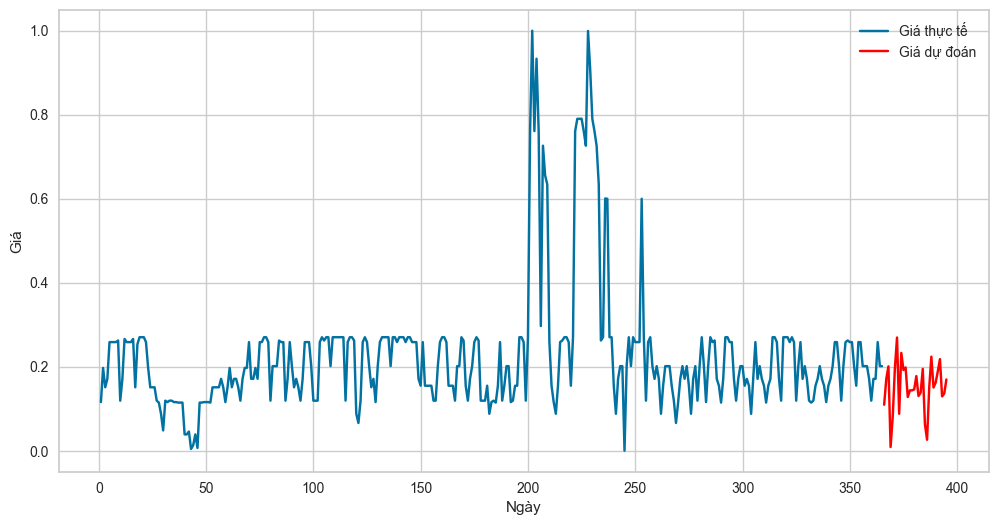

In [201]:
import pandas as pd
from hmmlearn import hmm
import matplotlib.pyplot as plt

# Đọc dữ liệu
# Chuẩn bị dữ liệu
df['Date'] = [x for x in range(1, 366)]
df['Price_10'] = (df['10'] - df['10'].min()) / (df['10'].max() - df['10'].min())
# Tạo HMM
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
# Huấn luyện HMM
model.fit(df['Price_10'].values.reshape(-1, 1))

# Dự đoán giá cho 30 ngày tiếp theo
last_day = df['Date'].max()
predicted_days = np.arange(last_day + 1, last_day + 31)
predicted_states = model.predict(df['Price_10'].values.reshape(-1, 1))
predicted_prices = []

# Khởi tạo giá trị đầu tiên cho dự đoán
current_price = df['Price_10'].values[-1]

# Sử dụng mô hình để dự đoán giá dựa trên trạng thái ẩn
for i in range(30):
    # Dự đoán trạng thái tiếp theo
    current_state = model.predict([[current_price]])[0]
    # Lấy mẫu từ phân phối Gaussian của trạng thái hiện tại
    predicted_price = np.random.normal(model.means_[current_state][0], np.sqrt(model.covars_[current_state][0][0]))
    predicted_prices.append(predicted_price)
    # Cập nhật giá hiện tại cho lần dự đoán tiếp theo
    current_price = predicted_price

# Chuyển đổi giá dự đoán về khoảng giá gốc
predicted_prices = np.array(predicted_prices) * (df['Price_10'].max() - df['Price_10'].min()) + df['Price_10'].min()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price_10'], label='Giá thực tế')
plt.plot(predicted_days, predicted_prices, color='red', label='Giá dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.show()